In [2]:
# Import relavant libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy

In [3]:
filename='vial_number.csv'
vial=pd.read_csv(filename)
print(vial)
# init=vial.loc[(vial['Sample']=='Whole Sample') & (vial['Position']== 'Top'),['Vial', 'Tube']]
# print(init)

    Vial          Sample  Tube Position  Wieght
0     23  Initial Sample     6      Top  1922.2
1     13  Initial Sample     7      Top  1828.6
2     19  Initial Sample     8      Top  1812.3
3     18  Initial Sample     9      Top  1818.7
4      1  Initial Sample    10      Top  2384.4
5      8    Whole Sample     6      Top  1849.0
6     16    Whole Sample     7      Top  1092.4
7     28    Whole Sample     8      Top  1403.8
8     27    Whole Sample     9      Top  1635.5
9     20    Whole Sample    10      Top  1590.4
10    24  Initial Sample     6   Bottom  1130.8
11    14  Initial Sample     7   Bottom  1211.0
12    21  Initial Sample     8   Bottom  1129.3
13    15  Initial Sample     9   Bottom  1079.7
14    26  Initial Sample    10   Bottom  1242.4
15    25    Whole Sample     6   Bottom  1472.1
16    17    Whole Sample     7   Bottom  1509.4
17    29    Whole Sample     8   Bottom  1365.9
18    30    Whole Sample     9   Bottom  1544.7
19    22    Whole Sample    10   Bottom 

In [4]:
z=[]
filename = 'data_export_vial24.csv'
data = pd.read_csv(filename)
count=data.shape[0]
z.append(count)
print(z)

[5312]


In [5]:
###open each file and extract count
int_1=vial['Vial']
count=[]
for f in int_1:
    filename = 'data_export_vial{}.csv'.format(f)
    data = pd.read_csv(filename)
    c=data.shape[0]
    count.append(c)
    
vial['Count']=count

### TODO: open each summary file and export imaged volume

In [6]:
## Open summary file and export imaged volume
import re
stringToMatch = 'Fluid Volume Imaged'
matchedLine = ''
V_image=[]
int_1=vial['Vial']

for f in int_1:
    filename='vial_{}_run_summary.txt'.format(f)
    with open(filename, 'r') as file:
        for line in file:
            if stringToMatch in line:
                matchedLine = line
                break
    ttx=re.findall("\d+\.\d+", matchedLine)
    ttx=float(ttx[0])
    V_image.append(ttx)
    
vial['V_imaged']=V_image

In [7]:
####TODO: Make corrections for salinity/dilution and imaged volume

# vial['Volume']=(vial['Wieght']/1000)*vial['V_imaged'] 
vial['Volume']=vial['V_imaged']    #The Wieght is in mg, using 1 g/mL to convert to volume TODO: account for salinity (22ppt) and lugols addition
vial['Conc']=vial['Count']/vial['Volume']  


In [8]:
###Refs for comparisons####
### algae count comparisons
##https://www.water.wa.gov.au/__data/assets/pdf_file/0009/3150/10085.pdf
##use mean wieght of cell to compare to counts from TSS
###https://mospace.umsystem.edu/xmlui/bitstream/handle/10355/46477/research.pdf

In [9]:
vial


,Vial,Sample,Tube,Position,Wieght,Count,V_imaged,Volume,Conc
0,23,Initial Sample,6,Top,1922.2,5150,0.1449,0.1449,35541.752933
1,13,Initial Sample,7,Top,1828.6,5186,0.1595,0.1595,32514.106583
2,19,Initial Sample,8,Top,1812.3,5126,0.1238,0.1238,41405.492730
3,18,Initial Sample,9,Top,1818.7,5144,0.1513,0.1513,33998.678123
4,1,Initial Sample,10,Top,2384.4,5149,0.1761,0.1761,29239.068711
5,8,Whole Sample,6,Top,1849.0,5110,0.1577,0.1577,32403.297400
6,16,Whole Sample,7,Top,1092.4,5184,0.0890,0.0890,58247.191011
7,28,Whole Sample,8,Top,1403.8,5051,0.1068,0.1068,47294.007491
8,27,Whole Sample,9,Top,1635.5,5092,0.1286,0.1286,39595.645412
9,20,Whole Sample,10,Top,1590.4,5094,0.1310,0.1310,38885.496183


In [10]:
#Set up definitions to extract difference between top and bottom
def des(dd,description):
    df_type=dd[dd['Sample']==description]
    return df_type;  
def tube(dd,description,number):
    df_type=des(dd,description)
    exp_u=df_type[df_type['Tube']==number]
    return exp_u;
def diff(dd,description,number):
    exp_u=tube(dd,description,number)
    top=exp_u[exp_u['Position']=='Top']
    bottom=exp_u[exp_u['Position']=='Bottom']
    red=bottom.iloc[0].Conc-top.iloc[0].Conc
    per=red/bottom.iloc[0].Conc
    return per 

In [11]:
#set up definition to create table of whole and inital sample differences 
df_filt=pd.DataFrame({'Tube': [6,7,8,9,10]})

def chart(dd,Description):
    df_filt[Description]=[diff(dd,Description, 6),diff(dd,Description, 7),diff(dd,Description, 8),diff(dd,Description, 9),diff(dd,Description, 10),]
    return df_filt

In [12]:
vvb=chart(vial,'Initial Sample')
vvb=chart(vial,'Whole Sample')
vvb

,Tube,Initial Sample,Whole Sample
0,6,0.317534,0.277108
1,7,0.266112,-0.293626
2,8,0.168024,0.016696
3,9,0.420684,0.079189
4,10,0.350118,0.193486


In [13]:
WT=vial.loc[(vial['Sample']=='Whole Sample') & (vial['Position']== 'Top')]
WB=vial.loc[(vial['Sample']=='Whole Sample') & (vial['Position']== 'Bottom')]
IT=vial.loc[(vial['Sample']=='Initial Sample') & (vial['Position']== 'Top')]
IB=vial.loc[(vial['Sample']=='Initial Sample') & (vial['Position']== 'Bottom')]

print('Whole Top =',WT['Conc'].mean(),'(mean)',WT['Conc'].std(),'(std)')
print('Whole Bottom =',WB['Conc'].mean(),'(mean)', WB['Conc'].std(),'(std)')
print('Initial Top =',IT['Conc'].mean(),'(mean)',IT['Conc'].std(),'(std)')
print('Initial Bottom =',IB['Conc'].mean(),'(mean)', IB['Conc'].std(),'(std)')
print('Whole =',(1-WT['Conc'].mean()/WB['Conc'].mean())*100,'% removal')
print('Initial =',(1-IT['Conc'].mean()/IB['Conc'].mean())*100,'% removal')

Whole Top = 43285.12749946724 (mean) 9890.876141885941 (std)
Whole Bottom = 45832.61172879388 (mean) 2263.030780575834 (std)
Initial Top = 34539.81981604673 (mean) 4489.867627436033 (std)
Initial Bottom = 49965.791660956296 (mean) 5860.362541134028 (std)
Whole = 5.558234918841009 % removal
Initial = 30.87306601601102 % removal


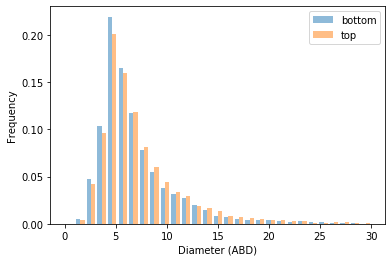

data_export_vial15.csv


In [14]:
### The histogram for the whole sample according to size
l=3 #position

# for f in l:
tt=IT['Vial'].iloc[l]
filename1 = 'data_export_vial{}.csv'.format(tt)
df_T = pd.read_csv(filename1)
bb=IB['Vial'].iloc[l]
filename2 = 'data_export_vial{}.csv'.format(bb)
df_B = pd.read_csv(filename2)
fig, ax = plt.subplots()
bins = np.linspace(0, 30, 30)
column ='Diameter (ABD)'

plt.hist([df_B[column],df_T[column]], bins, alpha=0.5, label=['bottom','top'],density=True)
ax.set_ylabel('Frequency')
ax.set_xlabel(column)
ax.legend(loc='upper right')
plt.show()
fig.savefig('Diameter-Hist.png')
print(filename2)

In [15]:
int_1=vial['Vial']
count=[]
for f in int_1:
    filename = 'Psuedofeces/vial_{}_data.csv'.format(f)
    data = pd.read_csv(filename)
    c=data.shape[0]
    count.append(c)

vial['PsuedoCount']=count
vial['PsuedoConc']=vial['PsuedoCount']/(vial['Volume']) 

WT=vial.loc[(vial['Sample']=='Whole Sample') & (vial['Position']== 'Top')]
WB=vial.loc[(vial['Sample']=='Whole Sample') & (vial['Position']== 'Bottom')]
IT=vial.loc[(vial['Sample']=='Initial Sample') & (vial['Position']== 'Top')]
IB=vial.loc[(vial['Sample']=='Initial Sample') & (vial['Position']== 'Bottom')]

print('Whole Top =',WT['PsuedoConc'].mean(),'(mean)',WT['PsuedoConc'].std(),'(std)')
print('Whole Bottom =',WB['PsuedoConc'].mean(),'(mean)', WB['PsuedoConc'].std(),'(std)')
print('Initial Top =',IT['PsuedoConc'].mean(),'(mean)',IT['PsuedoConc'].std(),'(std)')
print('Initial Bottom =',IB['PsuedoConc'].mean(),'(mean)', IB['PsuedoConc'].std(),'(std)')
print('Whole =',(1-WT['PsuedoConc'].mean()/WB['PsuedoConc'].mean())*100,'% removal')
print('Initial =',(1-IT['PsuedoConc'].mean()/IB['PsuedoConc'].mean())*100,'% removal')

Whole Top = 24426.993762692713 (mean) 6019.418391865016 (std)
Whole Bottom = 21430.98458499657 (mean) 1458.34616594358 (std)
Initial Top = 18373.708943422032 (mean) 2317.6801397755253 (std)
Initial Bottom = 22729.392267172785 (mean) 2994.465006665684 (std)
Whole = -13.979801841645623 % removal
Initial = 19.163219467339232 % removal


In [16]:
def diff_ps(dd,description,number):
    exp_u=tube(dd,description,number)
    top=exp_u[exp_u['Position']=='Top']
    bottom=exp_u[exp_u['Position']=='Bottom']
    red=bottom.iloc[0].PsuedoConc-top.iloc[0].PsuedoConc
    per=red/bottom.iloc[0].PsuedoConc
    return per 
#set up definition to create table of whole and inital sample differences 
df_filt_ps=pd.DataFrame({'Tube': [6,7,8,9,10]})

def chart_ps(dd,Description):
    df_filt_ps[Description]=[diff_ps(dd,Description, 6),diff_ps(dd,Description, 7),diff_ps(dd,Description, 8),diff_ps(dd,Description, 9),diff_ps(dd,Description, 10),]
    return df_filt_ps

In [17]:
xxc2=chart_ps(vial,'Initial Sample')
xxc2=chart_ps(vial,'Whole Sample')
xxc2

,Tube,Initial Sample,Whole Sample
0,6,0.216548,0.038746
1,7,0.058435,-0.583168
2,8,0.065148,-0.082005
3,9,0.310607,-0.086471
4,10,0.273357,0.027395


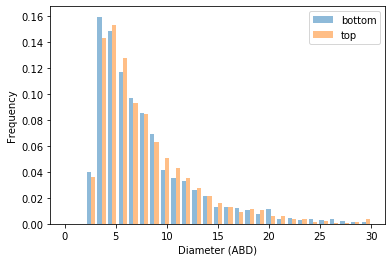

In [18]:
### The histogram for the Psuedofeces sample according to size
l=0 #position

# for f in l:
tt=IT['Vial'].iloc[l]
filename1 = 'Psuedofeces/vial_{}_data.csv'.format(tt)
df_T = pd.read_csv(filename1)
bb=IB['Vial'].iloc[l]
filename2 = 'Psuedofeces/vial_{}_data.csv'.format(bb)
df_B = pd.read_csv(filename2)
fig, ax = plt.subplots()
bins = np.linspace(0, 30, 30)
column ='Diameter (ABD)'

plt.hist([df_B[column],df_T[column]], bins, alpha=0.5, label=['bottom','top'],density=True)
ax.set_ylabel('Frequency')
ax.set_xlabel(column)
ax.legend(loc='upper right')
plt.show()
# fig.savefig('Diameter-Hist.png')


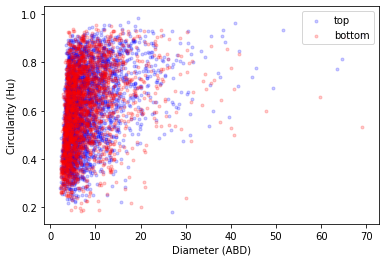

In [19]:
### The scatterplot for the Psuedofeces sample according to size vs circularity
l=3 #position

# for f in l:
tt=IT['Vial'].iloc[l]
filename1 = 'Psuedofeces/vial_{}_data.csv'.format(tt)
df_T = pd.read_csv(filename1)
bb=IB['Vial'].iloc[l]
filename2 = 'Psuedofeces/vial_{}_data.csv'.format(bb)
df_B = pd.read_csv(filename2)
fig, ax = plt.subplots()
column1 ='Diameter (ABD)'
column2 ='Circularity (Hu)'

plt.scatter(df_T[column1],df_T[column2], c='blue',marker='.',alpha=0.2, label='top')
plt.scatter(df_B[column1],df_B[column2], c='red', marker='.',alpha=0.2, label='bottom')

ax.set_ylabel(column2)
ax.set_xlabel(column1)
ax.legend(loc='upper right')
plt.show()
# fig.savefig('Diameter-Hist.png')


In [20]:
avg=[]
for f in int_1:
    filename = 'Psuedofeces/vial_{}_data.csv'.format(f)
    data = pd.read_csv(filename)
    ag=data['Diameter (ABD)'].mean()
    avg.append(ag)
    
vial['PsuedoSizeAvg']=avg

In [21]:
WT=vial.loc[(vial['Sample']=='Whole Sample') & (vial['Position']== 'Top')]
WB=vial.loc[(vial['Sample']=='Whole Sample') & (vial['Position']== 'Bottom')]
IT=vial.loc[(vial['Sample']=='Initial Sample') & (vial['Position']== 'Top')]
IB=vial.loc[(vial['Sample']=='Initial Sample') & (vial['Position']== 'Bottom')]

print('Whole Top =',WT['PsuedoSizeAvg'].mean(),'(mean)',WT['PsuedoSizeAvg'].std(),'(std)')
print('Whole Bottom =',WB['PsuedoSizeAvg'].mean(),'(mean)', WB['PsuedoSizeAvg'].std(),'(std)')
print('Initial Top =',IT['PsuedoSizeAvg'].mean(),'(mean)',IT['PsuedoSizeAvg'].std(),'(std)')
print('Initial Bottom =',IB['PsuedoSizeAvg'].mean(),'(mean)', IB['PsuedoSizeAvg'].std(),'(std)')


Whole Top = 9.839046427722726 (mean) 0.48626339603081953 (std)
Whole Bottom = 8.302403328416267 (mean) 0.2722449163765445 (std)
Initial Top = 8.319509026115838 (mean) 0.38784283953776105 (std)
Initial Bottom = 8.1213607257628 (mean) 0.10114837931326619 (std)


In [22]:
###To Do:
# calculate the non-psuedofeces counts for each tube
# calculate removal rates based on non-psuedofeces
#compare to previous removal rates for each tube